#### Hierarchical Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [35]:
travel= pd.read_csv(r"C:\Users\Vicky Yewle\Downloads\Machine Learning\Unsupervised Leaning\HierarchicalClustering\Hierarchical Clustering\Dataset\google_review_ratings.csv")
travel.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [36]:
#as we get no specification of rating so we are first getting knowledge from info

travel.rename
travel.rename(columns = {'User': 'Cust_id',
                        'Category 1': 'churches',
                        'Category 2': 'resorts',
'Category 3': 'beaches',
'Category 4': 'parks',
'Category 5': 'theatres',
'Category 6': 'museums',
'Category 7': 'malls',
'Category 8': 'zoo',
'Category 9': 'restaurants',
'Category 10': 'pubs',
'Category 11': 'local_services',
'Category 12': 'burger_shops',
'Category 13': 'lodgings',
'Category 14': 'juice_bars',
'Category 15': 'art_galleries',
'Category 16': 'dance_clubs',
'Category 17': 'swimming_pools',
'Category 18': 'gyms',
'Category 19': 'bakeries',
'Category 20': 'beauty',
'Category 21': 'cafes',
'Category 22': 'view_points',
'Category 23': 'monuments',
'Category 24': 'gardens',
'Category 25': 'Category_25'}, inplace = True)
travel.head()

,Cust_id,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,...,dance_clubs,swimming_pools,gyms,bakeries,beauty,cafes,view_points,monuments,gardens,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [37]:
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Cust_id         5456 non-null   object 
 1   churches        5456 non-null   float64
 2   resorts         5456 non-null   float64
 3   beaches         5456 non-null   float64
 4   parks           5456 non-null   float64
 5   theatres        5456 non-null   float64
 6   museums         5456 non-null   float64
 7   malls           5456 non-null   float64
 8   zoo             5456 non-null   float64
 9   restaurants     5456 non-null   float64
 10  pubs            5456 non-null   float64
 11  local_services  5456 non-null   object 
 12  burger_shops    5455 non-null   float64
 13  lodgings        5456 non-null   float64
 14  juice_bars      5456 non-null   float64
 15  art_galleries   5456 non-null   float64
 16  dance_clubs     5456 non-null   float64
 17  swimming_pools  5456 non-null   f

In [38]:
del travel['Unnamed: 25']

In [39]:
del travel['Cust_id']

round(100*(travel.isnull().sum())/len(travel), 2)

churches          0.00
resorts           0.00
beaches           0.00
parks             0.00
theatres          0.00
museums           0.00
malls             0.00
zoo               0.00
restaurants       0.00
pubs              0.00
local_services    0.00
burger_shops      0.02
lodgings          0.00
juice_bars        0.00
art_galleries     0.00
dance_clubs       0.00
swimming_pools    0.00
gyms              0.00
bakeries          0.00
beauty            0.00
cafes             0.00
view_points       0.00
monuments         0.00
gardens           0.02
dtype: float64

In [40]:
travel_clean = travel.dropna()

In [41]:
travel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   churches        5454 non-null   float64
 1   resorts         5454 non-null   float64
 2   beaches         5454 non-null   float64
 3   parks           5454 non-null   float64
 4   theatres        5454 non-null   float64
 5   museums         5454 non-null   float64
 6   malls           5454 non-null   float64
 7   zoo             5454 non-null   float64
 8   restaurants     5454 non-null   float64
 9   pubs            5454 non-null   float64
 10  local_services  5454 non-null   object 
 11  burger_shops    5454 non-null   float64
 12  lodgings        5454 non-null   float64
 13  juice_bars      5454 non-null   float64
 14  art_galleries   5454 non-null   float64
 15  dance_clubs     5454 non-null   float64
 16  swimming_pools  5454 non-null   float64
 17  gyms            5454 non-null   f

In [44]:
travel_clean['local_services'].value_counts()

5       1045
1.56      80
1.58      75
1.76      67
1.75      66
        ... 
3.82       1
3.18       1
3.84       1
0.78       1
4.08       1
Name: local_services, Length: 295, dtype: int64

In [45]:
travel_clean['local_services'] = travel_clean['local_services'].astype(float)
travel_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5454 entries, 0 to 5455
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   churches        5454 non-null   float64
 1   resorts         5454 non-null   float64
 2   beaches         5454 non-null   float64
 3   parks           5454 non-null   float64
 4   theatres        5454 non-null   float64
 5   museums         5454 non-null   float64
 6   malls           5454 non-null   float64
 7   zoo             5454 non-null   float64
 8   restaurants     5454 non-null   float64
 9   pubs            5454 non-null   float64
 10  local_services  5454 non-null   float64
 11  burger_shops    5454 non-null   float64
 12  lodgings        5454 non-null   float64
 13  juice_bars      5454 non-null   float64
 14  art_galleries   5454 non-null   float64
 15  dance_clubs     5454 non-null   float64
 16  swimming_pools  5454 non-null   float64
 17  gyms            5454 non-null   f

<ipython-input-45-360e6d16d255>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_clean['local_services'] = travel_clean['local_services'].astype(float)


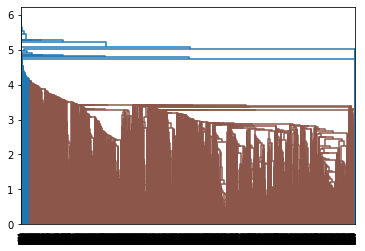

In [50]:
mergings=linkage(travel_clean, method='single', metric = 'euclidean')
dendrogram(mergings)
plt.show()

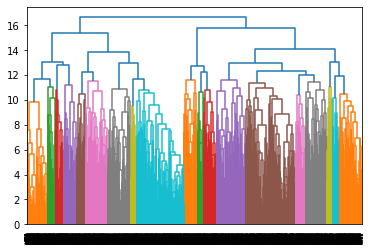

In [49]:
mergings=linkage(travel_clean, method='complete', metric = 'euclidean')
dendrogram(mergings)
plt.show()

In [51]:
cluster_labels = cut_tree(mergings, n_clusters =5).reshape(-1,)
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
travel_clean['cluster_labels'] = cluster_labels
travel_clean.head()

<ipython-input-52-219792387b8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  travel_clean['cluster_labels'] = cluster_labels


,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs,...,dance_clubs,swimming_pools,gyms,bakeries,beauty,cafes,view_points,monuments,gardens,cluster_labels
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0


In [54]:
t_gby =travel_clean.groupby(['cluster_labels'])
t_gby.first()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs,...,art_galleries,dance_clubs,swimming_pools,gyms,bakeries,beauty,cafes,view_points,monuments,gardens
cluster_labels,,,,,,,,,,,,,,,,,,,,,
0,0.00,0.00,3.63,3.65,5.00,2.92,5.00,2.35,2.33,2.64,...,1.74,0.59,0.50,0.00,0.50,0.0,0.00,0.00,0.00,0.00
1,0.51,1.38,1.40,1.57,5.00,2.67,2.67,3.30,5.00,5.00,...,5.00,2.44,5.00,0.00,0.00,0.0,0.00,1.56,0.00,0.00
2,0.00,1.39,1.39,1.41,2.69,1.47,2.67,2.70,3.31,3.33,...,1.98,5.00,5.00,0.00,5.00,0.0,0.00,0.00,0.00,0.00
3,5.00,5.00,5.00,1.24,1.25,4.77,4.14,3.79,2.92,2.90,...,5.00,0.87,0.88,0.90,1.08,5.0,0.51,0.51,0.52,0.65
4,4.59,3.88,3.92,2.76,2.74,2.33,2.45,1.16,5.00,1.11,...,5.00,0.69,0.68,0.69,0.76,5.0,1.01,5.00,5.00,5.00


In [55]:
t_gby=pd.DataFrame(t_gby.first())
t_gby = t_gby.T

<AxesSubplot:xlabel='cluster_labels'>

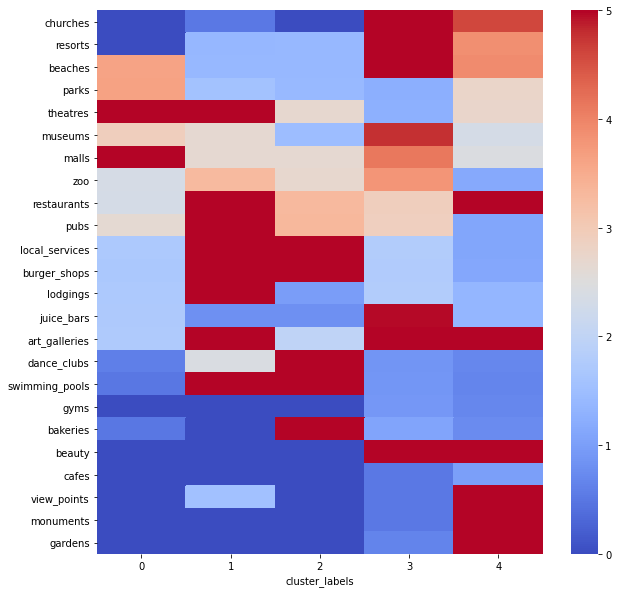

In [70]:
fig, ax= plt.subplots(figsize=(10,10))
sns.heatmap(t_gby, cmap="coolwarm")